<a href="https://colab.research.google.com/github/LeonardoSer/Univ/blob/main/NetOpt/jupyter_notebooks/MST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!python -m pip install -i https://pypi.gurobi.com gurobipy

import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gb
import random
import itertools as it

%matplotlib inline

Looking in indexes: https://pypi.gurobi.com


In [53]:
nodes = random.randint(5,10)
seed = random.randint(1,10)
probability = 0.4
G = nx.gnp_random_graph(nodes,probability)

In [54]:
for (u,v,w) in G.edges(data=True):
    w["weight"] = random.randint(1,20)

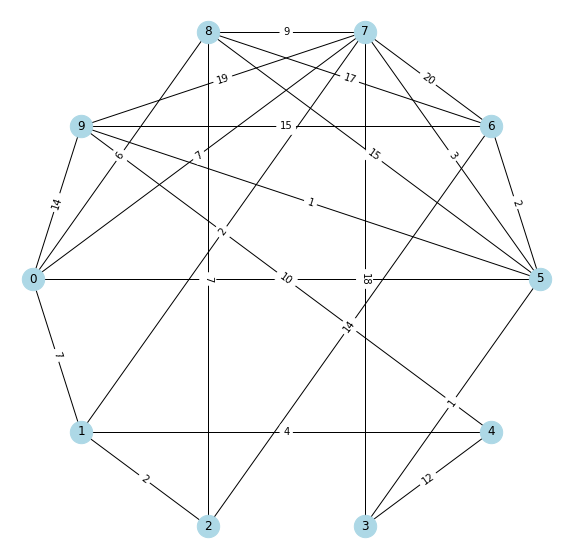

In [55]:
pos = nx.shell_layout(G)

edge_lab = {i:G[i[0]][i[1]]['weight'] for i in G.edges()}
node_lab = {i for i in G.nodes()}

plt.figure(figsize=(10,10))

nx.draw_networkx_edge_labels (G, pos, edge_labels=edge_lab)

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)

In [56]:
subsets = [list(set(it.combinations(set(G.nodes()), n))) for n in range(3, len(G.nodes()))]
len_subsets = [len(s) for s in subsets]



model = gb.Model("MST")
x = model.addVars(G.edges(), vtype=gb.GRB.BINARY, name="x")
model.setObjective(x.prod(nx.get_edge_attributes(G, "weight")))
model.addConstr(x.sum()<=len(G.nodes())-1, name="constraint1")
model.addConstrs((x.sum()<= len(S) for S in []))
model.update()
model.write("MST.lp")

In [64]:
subsets = []
for i in [list(set(it.combinations(set(G.nodes()), n))) for n in range(3, len(G.nodes()))]:
    for j in i:
        subsets.append(j)
len(subsets)

967

In [88]:
subs = {}
for s in subsets:
    E_s = []
    for node1 in s:
        for node2 in s:
            for e in G.edges:
                if(node1==e[0] and node2==e[1]):
                    E_s.append((e[0], e[1]))
    subs[s] = E_s

In [91]:
for k in subs:
    model.addConstr(x.sum()<= len(k)-1)
model.update

TypeError: ignored

In [80]:
x[(0,1)]

<gurobi.Var x[0,1]>